In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

from statsmodels.regression.linear_model import OLS
import statsmodels.api as sm
from scipy.stats import chi2_contingency

In [13]:
df = pd.read_csv(r'/Users/bendavid/Desktop/Data/state_list_all.csv')
df.dropna()

,STATE,Median personal earning white,Median personal earning black,Difference_Income_Personal,White poverty rate,Black poverty rate,Difference_poverty,Unemployment white,Unemployment black,Difference_unemployment,...,White education index,White income index,Difference education index,Education spending,GDP per capita,Public assistance per capita,Minimum wage,Median peronal earning,Poverty rate,Remote rate
2,Arizona,35370,26466.0,8904.0,11.036635,24.006826,12.970191,5.600465,10.497329,4.896864,...,5.363295,5.495628,0.947876,8238,44596.72,31.927054,10.00,30686.22761,17.372516,60.819197
3,Arkansas,29783,21467.0,8316.0,14.501356,33.857216,19.355861,4.940988,10.711158,5.770170,...,4.382345,4.008140,0.756640,10138,40641.87,184.675059,8.50,28117.17686,19.066288,55.827052
4,California,44344,31258.0,13086.0,10.036330,22.481444,12.445114,6.192211,11.923409,5.731198,...,6.223212,7.107686,1.558498,12497,67670.80,254.669724,10.50,32768.98594,15.343688,60.692573
5,Colorado,37842,30200.0,7642.0,8.247861,19.913807,11.665945,4.531674,9.714240,5.182566,...,6.373094,5.803388,2.153195,10201,59618.50,0.000000,9.30,35441.89990,11.490504,64.884788
6,Connecticut,45599,30269.0,15330.0,6.063988,20.470458,14.406471,5.244740,12.767315,7.522574,...,6.733497,7.197037,2.482233,20634,74542.31,108.051328,10.10,40436.49043,10.540539,65.991883
7,Delaware,38737,29400.0,9337.0,7.460182,20.152974,12.692792,5.496240,6.813388,1.317148,...,5.404632,6.134823,1.137370,15638,75382.46,29.600374,8.25,35913.56089,12.425640,63.298519
9,Florida,32279,23321.0,8958.0,11.029751,25.153385,14.123635,5.949461,11.502387,5.552926,...,5.322829,5.092495,1.492107,9346,45943.47,10.211495,8.10,29524.20667,15.702154,61.416032
10,Georgia,35263,25385.0,9878.0,11.097398,24.832836,13.735439,5.226513,11.071694,5.845181,...,5.340197,5.429173,1.098397,10809,51676.61,4.111657,5.15,31095.67811,17.046800,60.665125
13,Illinois,38570,25465.0,13105.0,8.679904,28.205952,19.526048,4.955105,16.432633,11.477528,...,6.027994,5.692095,1.813433,15740,62414.29,14.618979,8.25,34604.73099,13.561595,61.190855
14,Indiana,31213,23604.0,7609.0,11.571496,28.370927,16.799431,4.966432,13.005372,8.038939,...,4.729787,4.540558,0.875399,10262,52252.11,60.879076,7.25,30872.57699,14.541378,55.650542


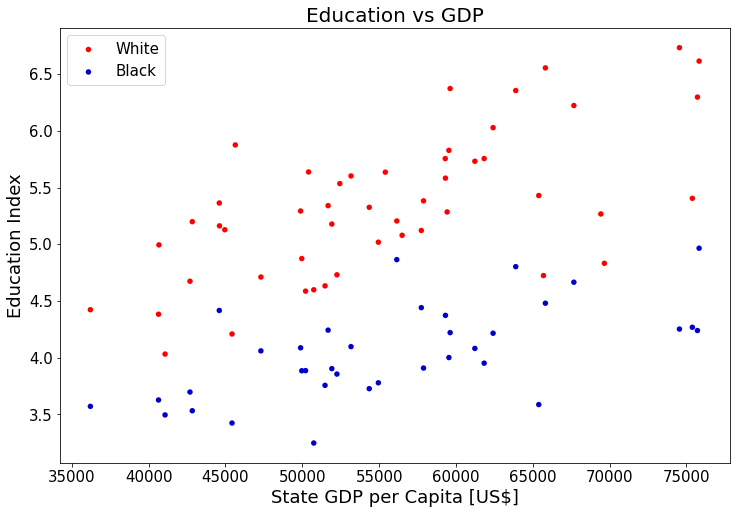

In [19]:
# Create a correlation plot 

fig, axs = plt.subplots(figsize=(12,8))
axs.scatter(df['GDP per capita'], df['White education index'], c='red', edgecolors='none', s=30, label='White')
axs.scatter(df['GDP per capita'], df['Black education index'], c='mediumblue', edgecolors='none', s=30, label='Black')
plt.title("Education vs GDP", fontsize=20)
axs.set_xlabel("State GDP per Capita [US$]", fontsize=18)
axs.set_ylabel("Education Index", fontsize=18)
axs.tick_params(labelsize=15)
axs.legend(prop={'size': 15})
plt.show()

In [13]:
# Remove District of Columbia as it is an outlier in this sample population 

df = df.drop(df.index[[8]])

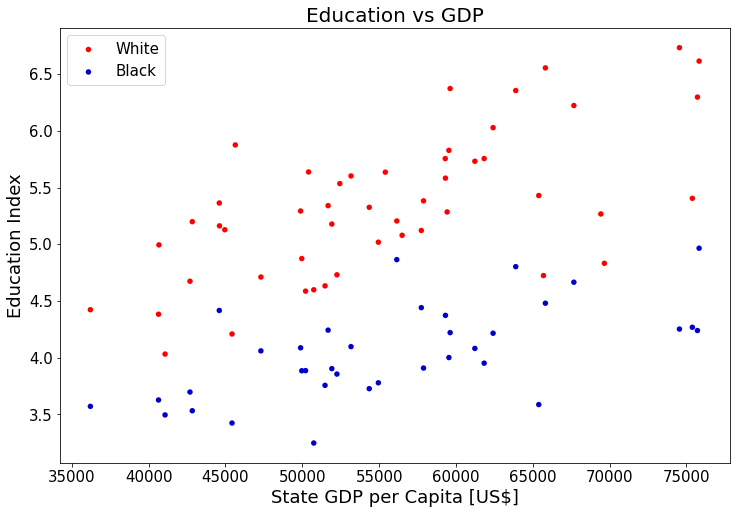

In [14]:
# Create a correlation plot without the outliar 

fig, axs = plt.subplots(figsize=(12,8))
axs.scatter(df['GDP per capita'], df['White education index'], c='red', edgecolors='none', s=30, label='White')
axs.scatter(df['GDP per capita'], df['Black education index'], c='mediumblue', edgecolors='none', s=30, label='Black')
plt.title("Education vs GDP", fontsize=20)
axs.set_xlabel("State GDP per Capita [US$]", fontsize=18)
axs.set_ylabel("Education Index", fontsize=18)
axs.tick_params(labelsize=15)
axs.legend(prop={'size': 15})
plt.show()

In [16]:
# ordinary least squares regression for black education index

df_new = df.dropna(subset=['Black education index'])

x_vals = df_new['GDP per capita'].values
y_vals = df_new['Black education index']

reg_model_1 = OLS(y_vals, sm.add_constant(x_vals)).fit()
display(reg_model_1.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     Black education index   R-squared:                       0.379
Model:                               OLS   Adj. R-squared:                  0.361
Method:                    Least Squares   F-statistic:                     21.37
Date:                   Fri, 25 Dec 2020   Prob (F-statistic):           4.99e-05
Time:                           18:34:05   Log-Likelihood:                -10.231
No. Observations:                     37   AIC:                             24.46
Df Residuals:                         35   BIC:                             27.68
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.6808      0.298      8.982      0.000       2.075       3.287
x1           2.44e-05   5.28e-06      4.622      0.000    1.37e-05    3.51e-05
==============================================================================
Omnibus:                        1.654   Durbin-Watson:                   1.805
Prob(Omnibus):                  0.437   Jarque-Bera (JB):                0.817
Skew:                           0.325   Prob(JB):                        0.665
Kurtosis:                       3.328   Cond. No.                     3.13e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [17]:
# ordinary least squares regression for white education index

x_vals = df['GDP per capita'].values
y_vals = df['White education index']

reg_model_2 = OLS(y_vals, sm.add_constant(x_vals)).fit()
display(reg_model_2.summary())


<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     White education index   R-squared:                       0.425
Model:                               OLS   Adj. R-squared:                  0.413
Method:                    Least Squares   F-statistic:                     35.43
Date:                   Fri, 25 Dec 2020   Prob (F-statistic):           2.97e-07
Time:                           18:34:11   Log-Likelihood:                -33.754
No. Observations:                     50   AIC:                             71.51
Df Residuals:                         48   BIC:                             75.33
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0706      0.387      7.925      0.000       2.292       3.850
x1          4.095e-05   6.88e-06      5.952      0.000    2.71e-05    5.48e-05
==============================================================================
Omnibus:                        1.137   Durbin-Watson:                   1.560
Prob(Omnibus):                  0.566   Jarque-Bera (JB):                1.161
Skew:                          -0.271   Prob(JB):                        0.559
Kurtosis:                       2.487   Cond. No.                     3.18e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.18e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:
# correlation between education index and GDP per capita

df['Black education index'].corr(df['GDP per capita'])

0.6156685685847336

In [12]:
df['White education index'].corr(df['GDP per capita'])

0.6516548641561117

In [19]:
stats.pearsonr(df_new['GDP per capita'], df_new['Black education index'])

(0.6156685685847334, 4.993840413436362e-05)

In [20]:
stats.pearsonr(df['GDP per capita'], df['White education index'])

(0.6516548641561117, 2.966534821923729e-07)

In [24]:
x_plot = np.linspace(35000, 75000, 100)

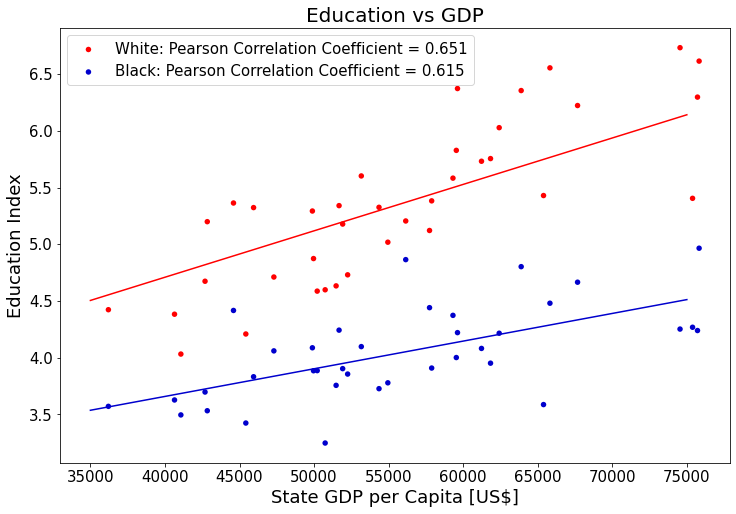

In [18]:
# Create correlation plot  

fig, axs = plt.subplots(figsize=(12,8))
axs.scatter(df_new['GDP per capita'], df_new['White education index'], c='red', edgecolors='none', s=30, 
            label= 'White: Pearson Correlation Coefficient = 0.651')

b0 = reg_model_2.params[0]
b1 = reg_model_2.params[1]
axs.plot(x_plot,x_plot*b1 + b0, color='red')

axs.scatter(df_new['GDP per capita'], df_new['Black education index'], c='mediumblue', edgecolors='none', s=30, 
            label='Black: Pearson Correlation Coefficient = 0.615')

b0 = reg_model_1.params[0]
b1 = reg_model_1.params[1]
axs.plot(x_plot,x_plot*b1 + b0, color='mediumblue')


plt.title("Education vs GDP", fontsize=20)
axs.set_xlabel("State GDP per Capita [US$]", fontsize=18)
axs.set_ylabel("Education Index", fontsize=18)
axs.tick_params(labelsize=15)
axs.legend(prop={'size': 15})
#plt.text(3, 2.2, "*Data Source: U.S. Census Bureau, American Community Survey", fontsize=15)
plt.show()